In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


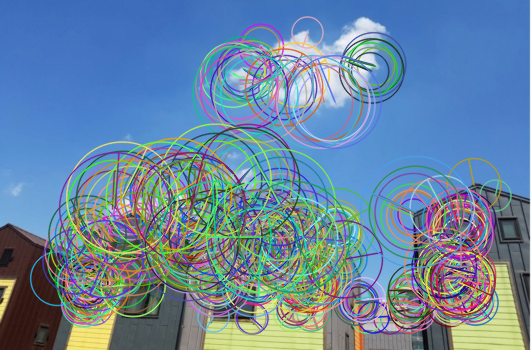

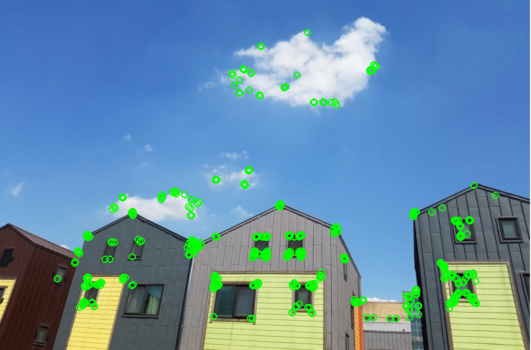

In [2]:
import cv2
from google.colab.patches import cv2_imshow

BASE_URL = '/content/mydrive/MyDrive/ComputerVision/Lab3Image/'
img = cv2.imread(BASE_URL+'house.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ORB 추출기 생성
orb = cv2.ORB_create()
# 키 포인트 검출과 서술 자 계산
# find the keypoints and descriptors with ORB
keypoints, descriptor = orb.detectAndCompute(img, None)
# 키 포인트 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

img_draw2 = cv2.drawKeypoints(img, keypoints, None, color = (0, 255, 0), flags = 0)
# 결과 출력
cv2_imshow(img_draw)
cv2_imshow(img_draw2)
cv2.waitKey()
cv2.destroyAllWindows()

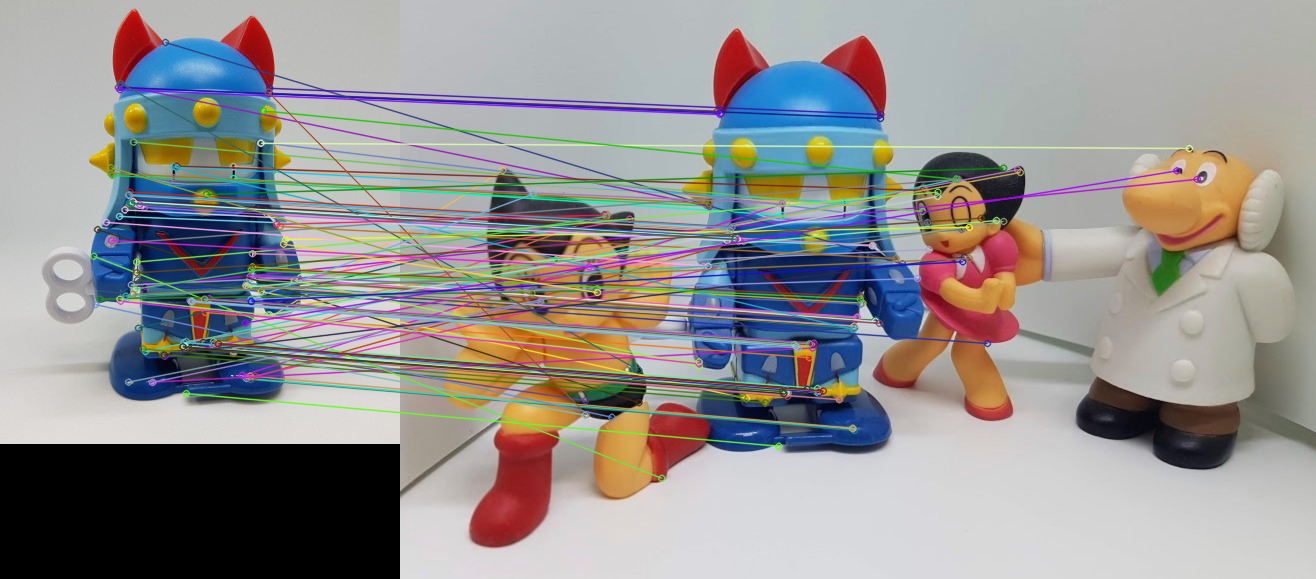

In [3]:
img1 = cv2.imread(BASE_URL+'taekwonv1.png')
img2 = cv2.imread(BASE_URL+'figures.png')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# sift 서술자 추출기 생성 -- 1
detector = cv2.ORB_create()

# 각 영상에 대해 키 포인트와 서술자 추출 -- 2
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# BFMatcher 생성, Hamming 거리, 상호 체크 -- 3
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# 매칭 계산 -- 4
matches = matcher.match(desc1, desc2)

# 매칭 결과 그리기 -- 5
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(res)
cv2.waitKey()
cv2.destroyAllWindows()

matches: 14131, min:22.00, max:79.00, thresh:33.40


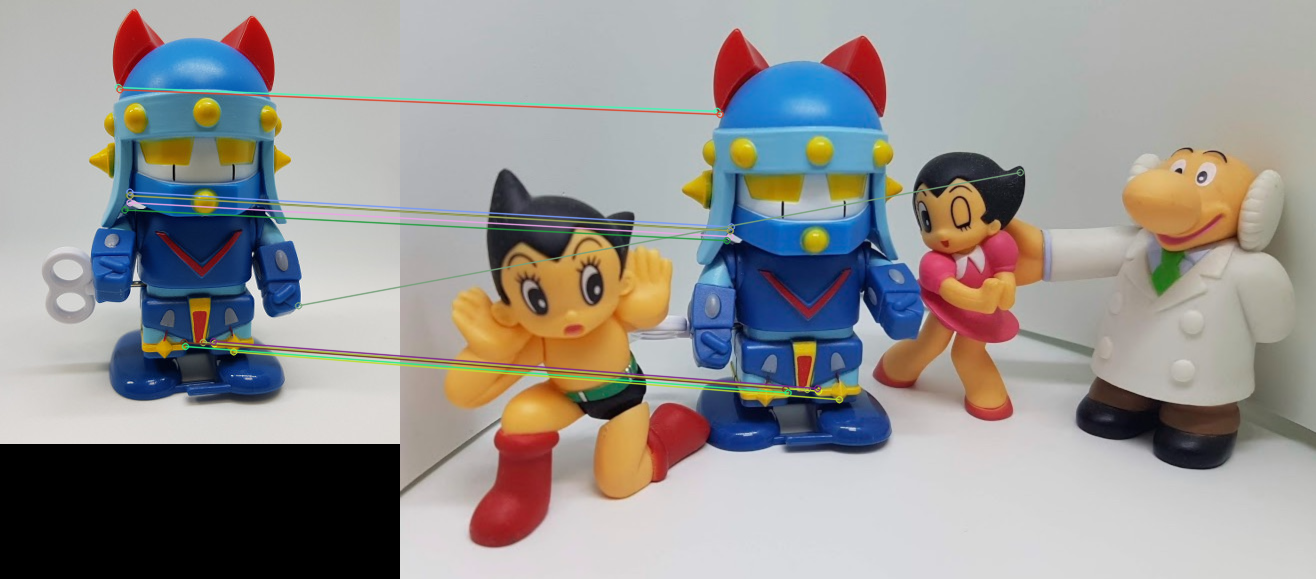

In [4]:
# BF-Hamming으로 매칭 -- 2
matcher  = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = matcher.match(desc1, desc2)

# 매칭 결과를 거리 기준 오름차순으로 정렬 -- 3
matches = sorted(matches, key = lambda x : x.distance)

# 최소 거리 값과 최대 거리 값 확보 -- 4
min_dist, max_dist = matches[0].distance, matches[-1].distance

# 최소 거리의 20% 지점을 임계점으로 설정 -- 5
ratio = 0.2
good_thresh = (max_dist - min_dist) * ratio + min_dist

# 임계점보다 작은 매칭점만 좋은 매칭점으로 분류 -- 6
good_matches = [m for m in matches if m.distance < good_thresh]
print('matches: %d%d, min:%.2f, max:%.2f, thresh:%.2f' %(len(good_matches), len(matches), min_dist, max_dist, good_thresh))

# 좋은 매칭점만 그리기 -- 7
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# 결과 출력
cv2_imshow(res)
cv2.waitKey()
cv2.destroyAllWindows()

matches: 14131, min:22.00, max:79.00, thresh:33.40


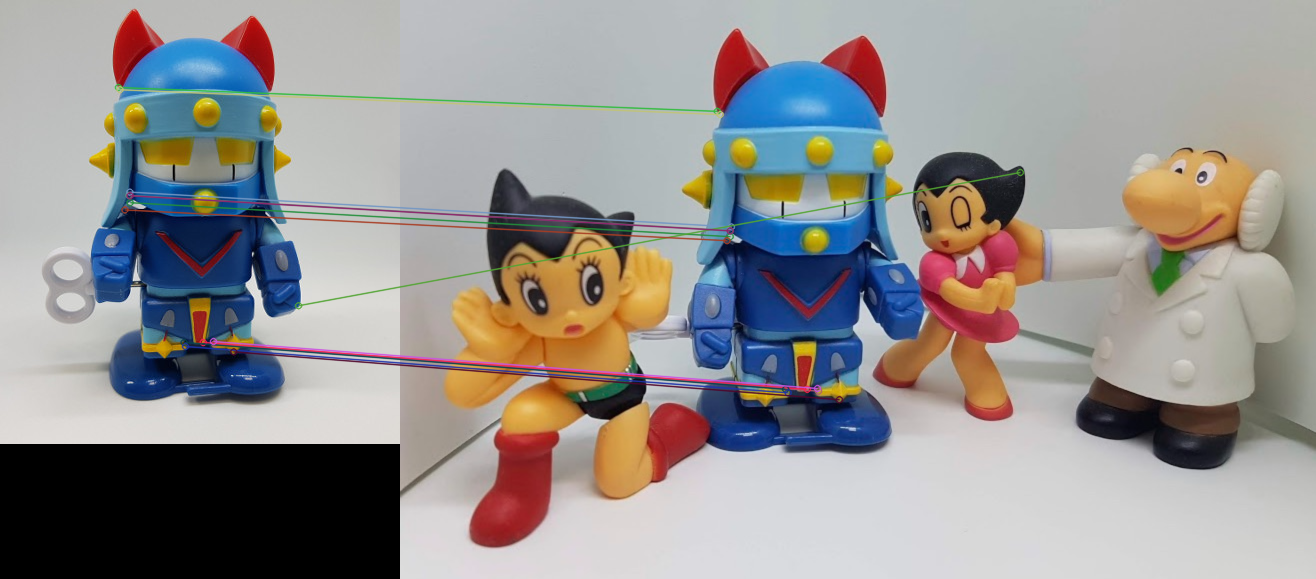

In [5]:
img1 = cv2.imread(BASE_URL+'taekwonv1.png')
img2 = cv2.imread(BASE_URL+'figures.png')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB 서술자 추출기- 1
detector = cv2.ORB_create()

# 각 영상에 대해 키 포인트와 서술자 추출 -
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# BFMatcher 생성, Hamming 거리, 상호 체크 -- 2
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = matcher.match(desc1, desc2)
# 매칭 결과를 거리 기준 오름차순으로 정렬 -- 3
matches = sorted(matches, key = lambda x : x.distance)

# 최소 거리 값과 최대 거리 값 확보 -- 4
min_dist, max_dist = matches[0].distance, matches[-1].distance

# 최소 거리의 20% 지점을 임계점으로 설정 -- 5
ratio = 0.2
good_thresh = (max_dist - min_dist) * ratio + min_dist

# 임계점보다 작은 매칭점만 좋은 매칭점으로 분류 -- 6
good_matches = [m for m in matches if m.distance < good_thresh]
print('matches: %d%d, min:%.2f, max:%.2f, thresh:%.2f' %(len(good_matches), len(matches), min_dist, max_dist, good_thresh))

# 좋은 매칭점만 그리기 -- 7
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# 결과 출력
cv2_imshow(res)
cv2.waitKey()
cv2.destroyAllWindows()
